# Modul 9 Struktur Data: *Heap Tree*, AVL/*Balance Tree*

Kembali ke [Struktur Data (dengan Python)](strukdat2023.qmd)

Seperti biasa, kita perlu `numpy` untuk fitur *array* dan perlu `graphviz` untuk visualisasi:

In [1]:
import numpy as np
import graphviz as gv

Kali ini, kita juga memerlukan kode dari modul sebelumnya, terlampir di bagian Lampiran di akhir modul ini.

## Implementasi *Heap Tree* dengan *array*

*Heap tree* adalah sejenis *binary tree* dengan beberapa sifat tambahan tertentu. *Heap tree* terbagi lagi menjadi dua jenis, yaitu *max heap* dan *min heap*.

* *Max heap* adalah *binary tree* dengan sifat tambahan berikut:

    - merupakan *tree* yang *complete* (terkadang disebut *almost complete*), yaitu tiap level (kecuali level terakhir) harus terisi penuh, sedangkan pengisian *node* di level terakhir harus dari paling kiri.

    - ***(Max Heap Property)*** Untuk tiap *node*, nilai data yang tersimpan di *node* tersebut harus **lebih besar** daripada (atau sama dengan) nilai data yang tersimpan di tiap *child* nya.

    Dengan demikian, pada *max heap*, data dengan nilai **terbesar** ada di *root*.

* *Min heap* adalah *binary tree* dengan sifat tambahan berikut:

    - merupakan *tree* yang *complete* (terkadang disebut *almost complete*)

    - ***(Min Heap Property)*** Untuk tiap *node*, nilai data yang tersimpan di *node* tersebut harus **lebih kecil** daripada (atau sama dengan) nilai data yang tersimpan di tiap *child* nya.

    Dengan demikian, pada *min heap*, data dengan nilai **terkecil** ada di *root*.

Beberapa hal lain tentang *heap tree*:

* Ketika membahas *deletion*, yang dihapus sudah pasti *root*, dan nilai yang dihapus juga di-`return` (seperti operasi `pop` di *stack*).

* *Insertion* selalu dilakukan di level paling dalam, tepat di sebelah kanan dari *node* yang sudah ada (agar *tree* tetap beersifat *complete*).

Selama berurusan dengan *heap tree*, ada (sekumpulan) operasi bernama *heapify*, yang tujuannya adalah memastikan bahwa *heap tree* memang memenuhi sifat *max/min heap property*. Beberapa variasi *heapify* adalah:

* *bottom-up*: dimulai dari suatu *leaf node* yang ditentukan, periksa dengan parentnya. Kemudian, periksa parent tersebut dengan parent dari parent tersebut. Terus ke atas hingga mencapai *root*.

* *top-down*: dimulai dari *root*,

    - untuk *max heap*: periksa dengan yang **terbesar** di antara semua *child* nya. Kemudian, periksa *child* tersebut dengan yang **terbesar** di antara semua *child* nya. Terus ke bawah, berhenti ketika sudah mencapai suatu *leaf node*.

    - untuk *min heap*: periksa dengan yang **terkecil** di antara semua *child* nya. Kemudian, periksa *child* tersebut dengan yang **terkecil** di antara semua *child* nya. Terus ke bawah, berhenti ketika sudah mencapai suatu *leaf node*.
    
* *heapify all*: periksa tiap *node* dengan parentnya, dimulai dari level terdalam, dimulai dari *node* paling kanan. Lanjut ke tiap *node* yang ada di sebelah kirinya, hingga level tersebut sudah diperiksa semua. Kemudian, lanjut ke level di atasnya, dimulai dari *node* yang paling kanan. Lanjut terus hingga mencapai *root*.

Pada *heap tree*, operasi *insertion* selalu diikuti dengan *heapify* yang *bottom-up*, dan operasi *deletion* selalu diikuti dengan *heapify* yang *top-down*.

Apabila diberikan sembarang *binary tree*, di antara ketiga variasi di atas, hanya *heapify all* yang menjamin *binary tree* berubah menjadi *heap tree*. Namun, apabila diberikan sembarang *heap tree*, operasi *insertion* dan *deletion* yang dilakukan (masing-masing diikuti *heapify* yang *bottom-up* atau *top-down*) akan tetap menjaga sifatnya sebagai *heap tree*, meskipun tidak dilakukan *heapify all* sama sekali.

Kalau ingin mengubah sembarang *binary tree* menjadi *heap tree*, kami menyediakan *method* bernama `completify` untuk membuat *binary tree* tersebut menjadi *complete*, yang kemudian bisa diikuti dengan penggunaan *heapify all*.

Kita akan mengimplementasikan *heap tree* dengan *array*. Karena *heap tree* adalah sejenis *binary tree*, kita bisa membuat `class ArrayMaxHeap` dan `class ArrayMinHeap` yang sama-sama meng-*inherit* dari `class ArrayBintree` dari [Modul 8](./Strukdat2023_Modul08.ipynb).

### Implementasi *Max Heap*

In [282]:
class ArrayMaxHeap(ArrayBintree):
    def __init__(self, dtype, height, emptydata=-9999):
        # menggunakan __init__ dari ArrayBintree,
        # melalui super() yaitu parent class
        super().__init__(dtype, height, emptydata)

        # atribut tambahan: banyaknya node yang sudah ada
        self.n_nodes = 0
    
    # semua method dari ArrayBintree otomatis sudah terdefinisi

    # Memeriksa apakah dua nilai (parent, child) memenuhi max heap property
    def is_correct_parent_child_data(self, parent_data, child_data):
        if (parent_data >= child_data):
            return True
        else:
            return False

    # Membuat binary tree menjadi complete (atau almost complete)
    # Idenya, tiap elemen yang bukan "data kosong" harus didempetkan ke kiri
    def completify(self):
        # Sangat mirip dengan insertion sort, hanya saja syaratnya yang beda
        for i in range(self.array_size): # i = 0, 1, 2, ..., n-1
            for j in range(i, 0, -1): # j = i, i-1, ..., 2, 1
                if ((self.array[j] != self.emptydata)
                    and (self.array[j-1] == self.emptydata)):
                    self.array[j-1] = self.array[j]
                    self.array[j] = self.emptydata
        # Setelah selesai, tentukan nilai n_nodes
        i = 0
        while (i < self.array_size) and (self.array[i] != self.emptydata):
            i += 1
        self.n_nodes = i

    # Pastikan, dari leaf tertentu ke atas, bahwa heap tree memang memenuhi
    # heap property
    def heapify_bottomup(self, child_idx):
        if child_idx > 0:
            parent_idx = self.get_parent_idx(child_idx)
            if not (self.is_correct_parent_child_data(
                self.array[parent_idx], self.array[child_idx]
                )): # Jika tidak memenuhi heap property, tukar
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp
            # heapify parent nya
            self.heapify_bottomup(parent_idx)

    def insert(self, newdata):
        if self.n_nodes == self.array_size:
            print("Error insert: array heap sudah penuh")
        else:
            self.array[self.n_nodes] = newdata
            self.heapify_bottomup(self.n_nodes)
            self.n_nodes += 1
    
    # Pastikan, dari atas ke bawah, bahwa heap tree memang memenuhi
    # heap property
    def heapify_topdown(self, parent_idx=None):
        # Awalnya mulai dari root
        if parent_idx == None:
            parent_idx = 0
        
        # Menentukan yang mana antara left child atau right child yang
        # lebih layak menjadi parent
        left_idx = self.get_left_child_idx(parent_idx)
        right_idx = self.get_right_child_idx(parent_idx)

        if ((left_idx != -1) and (right_idx != -1)
            and (self.array[left_idx] != self.emptydata)
            and (self.array[right_idx] != self.emptydata)):
            # Kasus dua child, mana yang lebih layak jadi parent?
            # (memperhatikan heap property)
            if self.is_correct_parent_child_data(
                self.array[left_idx], self.array[right_idx]
                ): # Jika left child lebih layak, pilih itu
                child_idx = left_idx
            else:
                child_idx = right_idx
        elif (left_idx != -1) and (self.array[left_idx] != self.emptydata):
            # Hanya satu child yaitu yang kiri, pilih saja
            child_idx = left_idx
        elif (right_idx != -1) and (self.array[right_idx] != self.emptydata):
            # Hanya satu child yaitu yang kanan, pilih saja
            child_idx = right_idx
        else: # tidak punya child; top down selesai
            return

        # Kalau child yang dipilih bahkan lebih layak daripada parent sekarang,
        # tukar agar heap property menjadi terpenuhi
        if self.is_correct_parent_child_data(
            self.array[child_idx], self.array[parent_idx]
            ):
            temp = self.array[child_idx]
            self.array[child_idx] = self.array[parent_idx]
            self.array[parent_idx] = temp
        
        # Lanjutkan heapify pada child tersebut
        self.heapify_topdown(child_idx)
    
    # Mengintip apa yang ada di root
    def peek(self):
        nilai = self.get_root()
        if nilai == self.emptydata:
            print("Error peek: heap tree sedang kosong")
            return None
        else:
            return nilai

    # Delete root
    def delete(self):
        # 1. Peroleh nilai root untuk di-return
        nilai_root = self.get_root()

        # Kalau ternyata sudah kosong sebelumnya, tidak ada yang bisa dihapus
        if nilai_root == self.emptydata:
            print("Error delete: heap tree sudah kosong sebelumnya")
            return None
        # Kalau tidak kosong, lanjut

        # 2. Ganti nilai di root dengan elemen ter-kanan di array
        self.set_root(self.array[self.n_nodes-1])

        # 3. "Hapus" elemen ter-kanan tersebut
        self.array[self.n_nodes-1] = self.emptydata
        self.n_nodes -= 1

        # 4. Lakukan heapify dari root ke bawah
        self.heapify_topdown()

        # 5. return nilai yang baru saja dihapus
        return nilai_root

    # Heapify untuk semua node
    def heapify_all(self):
        # Periksa dari node ter-kanan hingga node ter-kiri (kecuali root)
        for child_idx in range(self.n_nodes, 0, -1): # i = n, n-1, ..., 2, 1
            parent_idx = self.get_parent_idx(child_idx)
            # Jika heap property tidak terpenuhi, tukar
            if not (self.is_correct_parent_child_data(
                self.array[parent_idx], self.array[child_idx]
                )):
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp

Mengubah suatu *binary tree* (representasi *array*) menjadi *heap tree*

In [283]:
bintree1 = ArrayMaxHeap(int, 3)

In [284]:
list1 = [15, 22, 14, 75, -9999, 67, -9999, 32]
for i in range(len(list1)):
    bintree1.array[i] = list1[i]

In [285]:
print(bintree1.array)

[   15    22    14    75 -9999    67 -9999    32 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


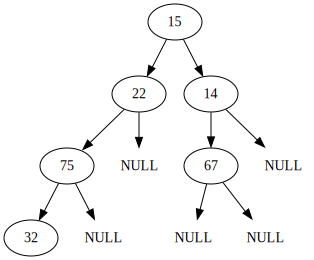

In [286]:
display(bintree1.get_digraph_simple())

In [287]:
bintree1.completify()

In [288]:
print(bintree1.array)

[   15    22    14    75    67    32 -9999 -9999 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


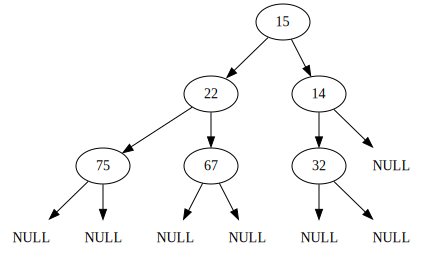

In [289]:
display(bintree1.get_digraph_simple())

In [290]:
bintree1.array[4]

67

In [291]:
bintree1.heapify_bottomup(4)

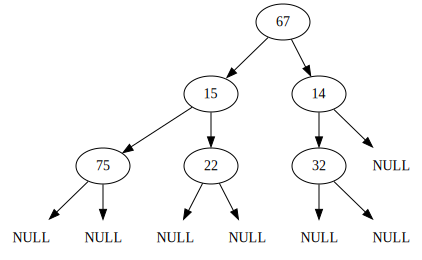

In [292]:
display(bintree1.get_digraph_simple())

In [293]:
bintree1.heapify_topdown()

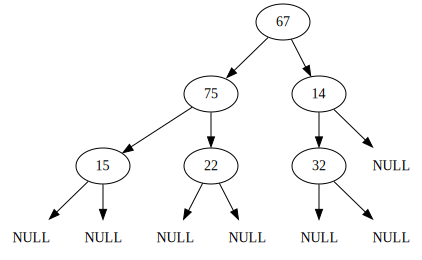

In [294]:
display(bintree1.get_digraph_simple())

In [295]:
print(bintree1.array)

[   67    75    14    15    22    32 -9999 -9999 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


In [296]:
bintree1.array[5]

32

In [297]:
bintree1.heapify_bottomup(5)

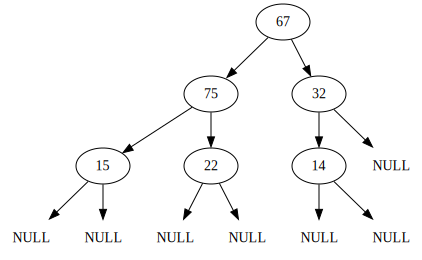

In [298]:
display(bintree1.get_digraph_simple())

In [299]:
bintree1.heapify_all()

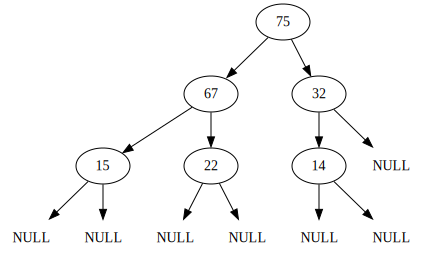

In [300]:
display(bintree1.get_digraph_simple())

Membangun *max heap* baru dari awal

In [301]:
arraymaxheap = ArrayMaxHeap(int, 4)

In [302]:
arraymaxheap.insert(50)

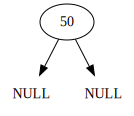

In [303]:
display(arraymaxheap.get_digraph_simple())

In [304]:
arraymaxheap.insert(40)

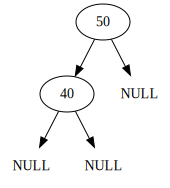

In [305]:
display(arraymaxheap.get_digraph_simple())

In [306]:
arraymaxheap.insert(70)

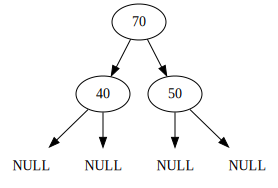

In [307]:
display(arraymaxheap.get_digraph_simple())

In [308]:
arraymaxheap.insert(45)

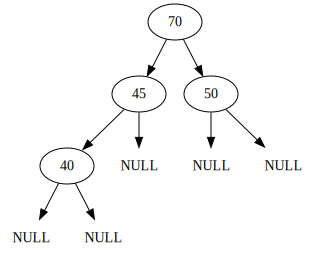

In [309]:
display(arraymaxheap.get_digraph_simple())

In [310]:
arraymaxheap.insert(60)

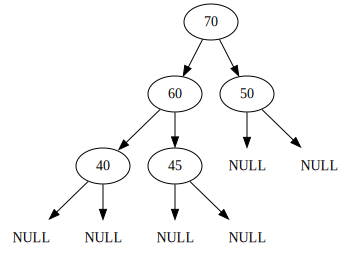

In [311]:
display(arraymaxheap.get_digraph_simple())

In [312]:
arraymaxheap.delete()

70

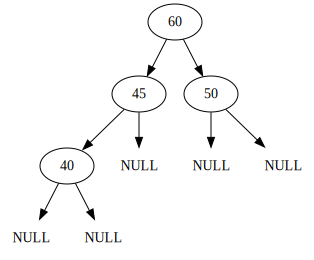

In [313]:
display(arraymaxheap.get_digraph_simple())

In [314]:
arraymaxheap.delete()

60

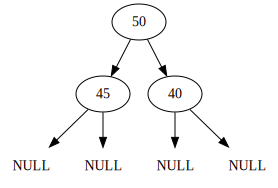

In [315]:
display(arraymaxheap.get_digraph_simple())

### Implementasi *Min Heap*

Dibandingkan dengan implementasi *max heap* di atas, hanya dua hal yang perlu diubah untuk memperoleh implementasi *min heap*:

* Ubah nama `class` dari `ArrayMaxHeap` menjadi `ArrayMinHeap`
* Modifikasi deinisi fungsi `is_correct_parent_child_data` di bagian `(parent_data >= child_data)` menjadi `(parent_data <= child_data)` (agar menggunakan *min heap property* daripada *max heap property*)

In [316]:
class ArrayMinHeap(ArrayBintree):
    def __init__(self, dtype, height, emptydata=-9999):
        # menggunakan __init__ dari ArrayBintree,
        # melalui super() yaitu parent class
        super().__init__(dtype, height, emptydata)

        # atribut tambahan: banyaknya node yang sudah ada
        self.n_nodes = 0
    
    # semua method dari ArrayBintree otomatis sudah terdefinisi

    # Memeriksa apakah dua nilai (parent, child) memenuhi min heap property
    def is_correct_parent_child_data(self, parent_data, child_data):
        if (parent_data <= child_data):
            return True
        else:
            return False

    # Membuat binary tree menjadi complete (atau almost complete)
    # Idenya, tiap elemen yang bukan "data kosong" harus didempetkan ke kiri
    def completify(self):
        # Sangat mirip dengan insertion sort, hanya saja syaratnya yang beda
        for i in range(self.array_size): # i = 0, 1, 2, ..., n-1
            for j in range(i, 0, -1): # j = i, i-1, ..., 2, 1
                if ((self.array[j] != self.emptydata)
                    and (self.array[j-1] == self.emptydata)):
                    self.array[j-1] = self.array[j]
                    self.array[j] = self.emptydata
        # Setelah selesai, tentukan nilai n_nodes
        i = 0
        while (i < self.array_size) and (self.array[i] != self.emptydata):
            i += 1
        self.n_nodes = i

    # Pastikan, dari leaf tertentu ke atas, bahwa heap tree memang memenuhi
    # heap property
    def heapify_bottomup(self, child_idx):
        if child_idx > 0:
            parent_idx = self.get_parent_idx(child_idx)
            if not (self.is_correct_parent_child_data(
                self.array[parent_idx], self.array[child_idx]
                )): # Jika tidak memenuhi heap property, tukar
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp
            # heapify parent nya
            self.heapify_bottomup(parent_idx)

    def insert(self, newdata):
        if self.n_nodes == self.array_size:
            print("Error insert: array heap sudah penuh")
        else:
            self.array[self.n_nodes] = newdata
            self.heapify_bottomup(self.n_nodes)
            self.n_nodes += 1
    
    # Pastikan, dari atas ke bawah, bahwa heap tree memang memenuhi
    # heap property
    def heapify_topdown(self, parent_idx=None):
        # Awalnya mulai dari root
        if parent_idx == None:
            parent_idx = 0
        
        # Menentukan yang mana antara left child atau right child yang
        # lebih layak menjadi parent
        left_idx = self.get_left_child_idx(parent_idx)
        right_idx = self.get_right_child_idx(parent_idx)

        if ((left_idx != -1) and (right_idx != -1)
            and (self.array[left_idx] != self.emptydata)
            and (self.array[right_idx] != self.emptydata)):
            # Kasus dua child, mana yang lebih layak jadi parent?
            # (memperhatikan heap property)
            if self.is_correct_parent_child_data(
                self.array[left_idx], self.array[right_idx]
                ): # Jika left child lebih layak, pilih itu
                child_idx = left_idx
            else:
                child_idx = right_idx
        elif (left_idx != -1) and (self.array[left_idx] != self.emptydata):
            # Hanya satu child yaitu yang kiri, pilih saja
            child_idx = left_idx
        elif (right_idx != -1) and (self.array[right_idx] != self.emptydata):
            # Hanya satu child yaitu yang kanan, pilih saja
            child_idx = right_idx
        else: # tidak punya child; top down selesai
            return

        # Kalau child yang dipilih bahkan lebih layak daripada parent sekarang,
        # tukar agar heap property menjadi terpenuhi
        if self.is_correct_parent_child_data(
            self.array[child_idx], self.array[parent_idx]
            ):
            temp = self.array[child_idx]
            self.array[child_idx] = self.array[parent_idx]
            self.array[parent_idx] = temp
        
        # Lanjutkan heapify pada child tersebut
        self.heapify_topdown(child_idx)
    
    # Mengintip apa yang ada di root
    def peek(self):
        nilai = self.get_root()
        if nilai == self.emptydata:
            print("Error peek: heap tree sedang kosong")
            return None
        else:
            return nilai

    # Delete root
    def delete(self):
        # 1. Peroleh nilai root untuk di-return
        nilai_root = self.get_root()

        # Kalau ternyata sudah kosong sebelumnya, tidak ada yang bisa dihapus
        if nilai_root == self.emptydata:
            print("Error delete: heap tree sudah kosong sebelumnya")
            return None
        # Kalau tidak kosong, lanjut

        # 2. Ganti nilai di root dengan elemen ter-kanan di array
        self.set_root(self.array[self.n_nodes-1])

        # 3. "Hapus" elemen ter-kanan tersebut
        self.array[self.n_nodes-1] = self.emptydata
        self.n_nodes -= 1

        # 4. Lakukan heapify dari root ke bawah
        self.heapify_topdown()

        # 5. return nilai yang baru saja dihapus
        return nilai_root

    # Heapify untuk semua node
    def heapify_all(self):
        # Periksa dari node ter-kanan hingga node ter-kiri (kecuali root)
        for child_idx in range(self.n_nodes, 0, -1): # i = n, n-1, ..., 2, 1
            parent_idx = self.get_parent_idx(child_idx)
            # Jika heap property tidak terpenuhi, tukar
            if not (self.is_correct_parent_child_data(
                self.array[parent_idx], self.array[child_idx]
                )):
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp

In [317]:
arrayminheap = ArrayMinHeap(int, 3)

In [318]:
arrayminheap.insert(78)

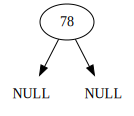

In [319]:
display(arrayminheap.get_digraph_simple())

In [320]:
arrayminheap.insert(43)

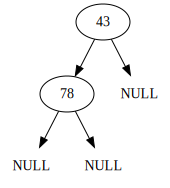

In [321]:
display(arrayminheap.get_digraph_simple())

In [322]:
arrayminheap.insert(21)

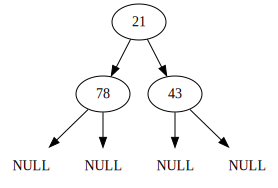

In [323]:
display(arrayminheap.get_digraph_simple())

In [324]:
arrayminheap.insert(39)

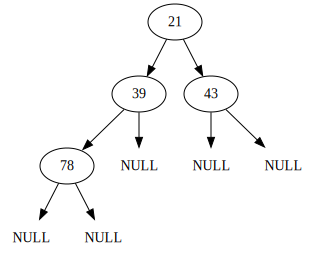

In [325]:
display(arrayminheap.get_digraph_simple())

In [326]:
arrayminheap.insert(15)

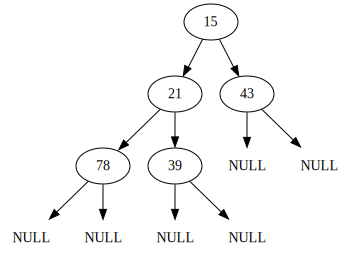

In [327]:
display(arrayminheap.get_digraph_simple())

In [328]:
arrayminheap.delete()

15

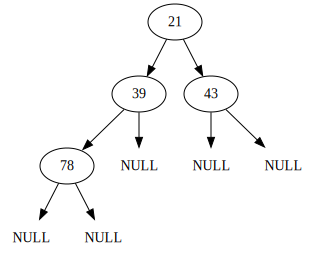

In [329]:
display(arrayminheap.get_digraph_simple())

In [330]:
arrayminheap.delete()

21

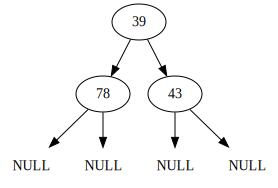

In [331]:
display(arrayminheap.get_digraph_simple())

## Implementasi AVL/*Balance Tree* dengan *pointer* (*linked* AVL *tree*)

Suatu *AVL tree*, terkadang juga disebut *balance tree*, adalah semacam *binary search tree* (BST) dengan pertimbangan tambahan ketika *insertion* maupun *deletion*, yaitu dilakukan yang namanya *re-balancing* agar pohon tidak terlalu "berat sebelah". *Re-balancing* di *AVL tree* dilakukan dengan yang namanya "rotasi" (*rotation*) terhadap *node* tertentu, bisa ke kiri (*left rotation*) ataupun ke kanan (*right rotation*).

Kapan dilakukannya *re-balancing*, tergantung suatu ukuran yang disebut *balance factor*, yang dimiliki oleh tiap *node*, dan dihitung sebagai selisih antara *height* dari *left subtree* dengan *height* dari *right subtree*. *Balance factor* diharapkan tidak kurang dari -1 dan tidak lebih dari 1; kalau aturan ini dilanggar (misalnya ketika *insertion* maupun *deletion*), barulah dilakukan *re-balancing* dengan *rotation* yang sesuai agar semua *balance factor* kembali mematuhi aturan tersebut.

Pada *AVL tree*, ketika ada pelanggaran nilai *balance factor*, ada empat kemungkinan kasus: LL, LR, RL, dan RR, di mana L artinya *left* dan R artinya *right*. Di antara empat kasus tersebut, tindakan *re-balancing* yang dilakukan bisa berupa satu ataupun dua rotasi, dan tiap rotasi bisa berupa rotasi kiri atau rotasi kanan, tergantung kasusnya.

*Fun fact*: AVL adalah singkatan dari dua penemunya, Georgy Maximovich **Adelson-Velsky** dan Evgenii Mikhailovich **Landis**.

Karena *AVL tree* adalah modifikasi dari *binary search tree* (BST), di bawah ini, diimplementasikan `class LinkedAVL` yang meng-*inherit* dari `class LinkedBST` dari [Modul 8](./Strukdat2023_Modul08.ipynb).

### Implementasi *linked AVL tree*

In [5]:
class LinkedAVL(LinkedBST):
    def __init__(self):
        # menggunakan __init__ dari LinkedBST,
        # melalui super() yaitu parent class
        super().__init__()

    def get_node_height(self, node):
        if node == None:
            return -1
        left_height = self.get_node_height(node.left)
        right_height = self.get_node_height(node.right)
        node_height = 1 + max(left_height, right_height)
        return node_height

    def get_tree_height(self):
        return self.get_node_height(self.root)

    def get_balance_factor(self, node):
        if node == None:
            return 0
        left_height = self.get_node_height(node.left)
        right_height = self.get_node_height(node.right)
        balance_factor = left_height - right_height
        return balance_factor

    def left_rotate(self, x):
        #  x
        #   \
        #    y
        #   / \
        #  S   z
        y = x.right
        S = y.left # left subtree dari y

        # rotate
        y.left = x
        x.right = S
        #   y
        #  / \
        # x   z
        #  \
        #   S

        # root baru
        return y

    def right_rotate(self, x):
        #     x
        #    /
        #   y
        #  / \
        # z   S
        y = x.left
        S = y.right # right subtree dari y

        # rotate
        y.right = x
        x.left = S
        #   y
        #  / \
        # z   x
        #    /
        #   S

        # root baru
        return y

    # Kali ini insert harus secara rekursif
    # agar bisa sekaligus melakukan re-balancing secara bottom-up
    def insert(self, newdata):
        if self.search(newdata) == None: # jika data belum ada, boleh insert
            self.root = self.insert_rec(newdata, current=self.root)
        else:
            print("Error insert: data sudah ada di AVL tree, yaitu", newdata)
    def insert_rec(self, newdata, current):
        if current == None:
            return BintreeNode(newdata)
        elif newdata < current.data:
            current.left = self.insert_rec(newdata, current=current.left)
        else: # newdata > temp.data
            current.right = self.insert_rec(newdata, current=current.right)
        
        cur_BF = self.get_balance_factor(current)
        left_BF = self.get_balance_factor(current.left)
        right_BF = self.get_balance_factor(current.right)

        # re-balancing, bagi kasus tergantung balance factor
        if (cur_BF > 1 and left_BF > 0): # kasus LL
            #        current
            #       /
            #   left
            #  /
            # n

            # solusi: right rotate current
            return self.right_rotate(current)
            #   left
            #  /    \
            # n      current
        
        elif (cur_BF > 1 and left_BF <= 0): # kasus LR
            #      current
            #     /
            # left
            #     \
            #      n
            #       \
            #        S

            # S: subtree
            
            # solusi
            # step 1: left rotate left child
            current.left = self.left_rotate(current.left)
            #        current
            #       /
            #      n
            #     / \
            # left   S

            # step 2: right rotate current
            return self.right_rotate(current)
            #      n
            #     / \
            # left   current
            #       /
            #      S

        elif (cur_BF < -1 and right_BF <= 0): # kasus RR
            # current
            #        \
            #         right
            #        /     \
            #       S       n

            # S: subtree

            # solusi: left rotate current
            return self.left_rotate(current)
            #         right
            #        /     \
            # current       n
            #              /
            #             S

        elif (cur_BF < -1 and right_BF > 0): # kasus RL
            # current
            #        \
            #         right
            #        /
            #       n
            #      /
            #     S

            # S: subtree

            # solusi
            # step 1: right rotate right child
            current.right = self.right_rotate(current.right)
            # current
            #        \
            #         n
            #        / \
            #       S   right

            # step 2: left rotate current
            return self.right_rotate(current)
            #         n
            #        / \
            # current   right
            #          /
            #         S

        return current

    # Deletion juga secara rekursif
    # agar sekaligus melakukan re-balancing secara bottom-up
    def delete(self, x, inorder_pred=False):
        if self.search(x) != None:
            self.root = self.delete_rec(x, current=self.root,
                                        inorder_pred=inorder_pred)
        else:
            print("Error delete: tidak ditemukan data", x)
    def delete_rec(self, x, current, inorder_pred=False):
        if current == None:
            return current
        elif x < current.data:
            current.left = self.delete_rec(x, current=current.left,
                                           inorder_pred=inorder_pred)
        elif x > current.data:
            current.right = self.delete_rec(x, current=current.right,
                                            inorder_pred=inorder_pred)
        # untuk elif/else berikut ini, x == current.data, sehingga dihapus
        elif current.left == None: # hanya satu child (kanan)
            temp = current.right
            del current
            return temp
        elif current.right == None: # hanya satu child (kiri)
            temp = current.left
            del current
            return temp

        # dua child
        elif inorder_pred: # metode inorder predecessor
            inorder_left = []
            self.get_inorder(current=current.left, result=inorder_left)
            inorder_pred_val = inorder_left[-1]

            current.data = inorder_pred_val
            current.left = self.delete_rec(
                inorder_pred_val, current=current.left,
                inorder_pred=inorder_pred
            )
        else: # metode inorder succcessor
            inorder_right = []
            self.get_inorder(current=current.right, result=inorder_right)
            inorder_succ_val = inorder_right[0]

            current.data = inorder_succ_val
            current.right = self.delete_rec(
                inorder_succ_val, current=current.right,
                inorder_pred=inorder_pred
            )
        
        cur_BF = self.get_balance_factor(current)
        left_BF = self.get_balance_factor(current.left)
        right_BF = self.get_balance_factor(current.right)

        # re-balancing, bagi kasus tergantung balance factor
        if (cur_BF > 1 and left_BF > 0): # kasus LL
            # solusi: right rotate current
            return self.right_rotate(current)
        elif (cur_BF > 1 and left_BF <= 0): # kasus LR
            # step 1: left rotate left child
            current.left = self.left_rotate(current.left)
            # step 2: right rotate current
            return self.right_rotate(current)
        elif (cur_BF < -1 and right_BF <= 0): # kasus RR
            # solusi: left rotate current
            return self.left_rotate(current)
        elif (cur_BF < -1 and right_BF > 0): # kasus RL
            # step 1: right rotate right child
            current.right = self.right_rotate(current.right)
            # step 2: left rotate current
            return self.right_rotate(current)

        return current

In [6]:
linkedavl = LinkedAVL()

In [7]:
linkedavl.insert(2)

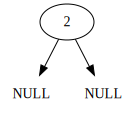

In [8]:
display(linkedavl.get_digraph_simple())

In [9]:
linkedavl.insert(1)

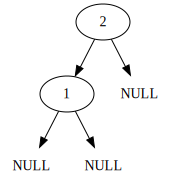

In [10]:
display(linkedavl.get_digraph_simple())

In [11]:
linkedavl.insert(5)

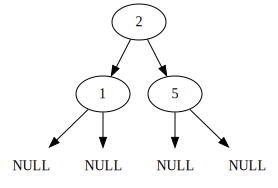

In [12]:
display(linkedavl.get_digraph_simple())

In [13]:
linkedavl.insert(3)

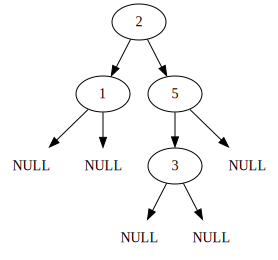

In [14]:
display(linkedavl.get_digraph_simple())

In [15]:
linkedavl.insert(7)

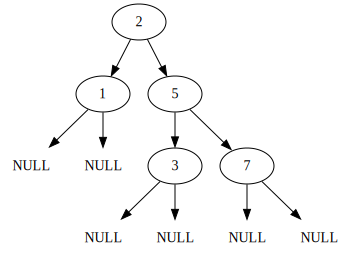

In [16]:
display(linkedavl.get_digraph_simple())

In [17]:
linkedavl.insert(10)

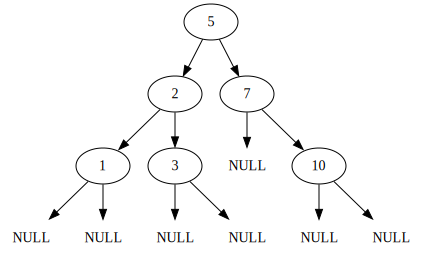

In [18]:
display(linkedavl.get_digraph_simple())

In [19]:
linkedavl.delete(7)

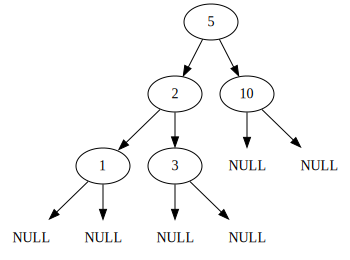

In [20]:
display(linkedavl.get_digraph_simple())

In [21]:
linkedavl.delete(2)

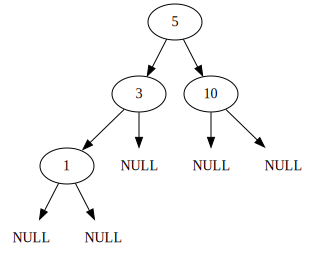

In [22]:
display(linkedavl.get_digraph_simple())

In [23]:
linkedavl.delete(5)

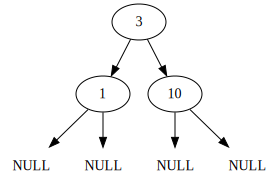

In [24]:
display(linkedavl.get_digraph_simple())

## Lampiran kode yang diperlukan dari modul-modul sebelumnya

### `ArrayBintree` dari [Modul 8](./Strukdat2023_Modul08.ipynb)

In [ ]:
class ArrayBintree:
    def __init__(self, dtype, height, emptydata=-9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height+1) - 1
        self.array = np.empty(self.array_size, dtype=dtype)
        for i in range(self.array_size):
            self.array[i] = emptydata

    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data

    def set_root(self, newdata):
        self.array[0] = newdata

    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("Error get_data: indeks di luar ukuran tree")
            return None

    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("Error set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx):
        left_idx = 2*node_idx + 1
        if left_idx < self.array_size:
            return left_idx
        else:
            return -1

    def get_left_child(self, node_idx):
        left_idx = self.get_left_child_idx(node_idx)
        if left_idx != -1:
            data = self.array[left_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_right_child_idx(self, node_idx):
        right_idx = 2*node_idx + 2
        if right_idx < self.array_size:
            return right_idx
        else:
            return -1

    def get_right_child(self, node_idx):
        right_idx = self.get_right_child_idx(node_idx)
        if right_idx != -1:
            data = self.array[right_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = int(np.floor( (node_idx - 1)/2 ))
        return idx

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_preorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_preorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_inorder(current=left_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_inorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_postorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_postorder(current=right_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label=str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label="NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label="NULL", shape="none")
        return digraph

### `BintreeNode`, `LinkedBintree`, `LinkedBST` dari [Modul 8](./Strukdat2023_Modul08.ipynb)

In [2]:
class BintreeNode:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

In [3]:
class LinkedBintree:
    def __init__(self):
        self.root = None

    def is_empty(self):
        if self.root == None:
            return True
        else:
            return False

    def get_root_data(self):
        if self.is_empty():
            print("Error get_root_data: tree sedang kosong")
            return None
        else:
            return self.root.data

    def set_root_data(self, newdata):
        if self.is_empty():
            self.root = BintreeNode(newdata)
        else:
            self.root.data = newdata

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

            # kiri
            if current.left != None:
                self.get_preorder(current.left, result=result)
            
            # kanan
            if current.right != None:
                self.get_preorder(current.right, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # kiri
            if current.left != None:
                self.get_inorder(current.left, result=result)
            
            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

            # kanan
            if current.right != None:
                self.get_inorder(current.right, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # kiri
            if current.left != None:
                self.get_postorder(current.left, result=result)
            
            # kanan
            if current.right != None:
                self.get_postorder(current.right, result=result)

            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

        if is_starting_node:
            return result

    # berdasarkan algoritma preorder traversal :D
    def get_digraph_simple(self, current=None, node_name=None, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = gv.Digraph()
            current = self.root
            node_name = "root"
        
        if current != None:
            # tengah
            result.node(node_name, label=str(current.data))

            # kiri
            left_name = node_name + "->left"
            result.edge(node_name, left_name)
            self.get_digraph_simple(
                current=current.left, node_name=left_name, result=result
            )
            
            # kanan
            right_name = node_name + "->right"
            self.get_digraph_simple(
                current=current.right, node_name=right_name, result=result
            )
            result.edge(node_name, right_name)
        else:
            result.node(node_name, label="NULL", shape="none")
        
        if is_starting_node:
            return result

In [4]:
class LinkedBST(LinkedBintree):
    def __init__(self):
        # menggunakan __init__ dari parent class,
        # melalui super() yaitu parent class
        super().__init__()
    
    # semua method dari LinkedBintree otomatis sudah terdefinisi

    # cari elemen di BST
    def search(self, x):
        temp = self.root
        while (temp != None):
            if x == temp.data:
                return x
            elif x < temp.data:
                temp = temp.left
            else:
                temp = temp.right
        return None

    # insertion
    def insert(self, newdata):
        if self.root == None:
            self.root = BintreeNode(newdata)
            return
        temp = self.root
        while (temp != None):
            if newdata == temp.data:
                print("Error insert: data sudah ada di BST, yaitu", newdata)
                return
            elif newdata < temp.data:
                if temp.left == None:
                    temp.left = BintreeNode(newdata)
                    return
                else:
                    temp = temp.left
            else: # newdata > temp.data
                if temp.right == None:
                    temp.right = BintreeNode(newdata)
                    return
                else:
                    temp = temp.right

    # deletion
    def delete(self, x, inorder_pred=False):
        if self.is_empty():
            print("Error: BST kosong")
            return
        prev = self.root
        turn = ""
        if x < prev.data:
            if prev.left == None:
                print("Error delete: tidak ditemukan data yang bernilai", x)
                return
            else:
                temp = prev.left
                turn = "left"
        elif x > prev.data:
            if prev.right == None:
                print("Error delete: tidak ditemukan data yang bernilai", x)
                return
            else:
                temp = prev.right
                turn = "right"
        else:
            temp = prev
        
        while (temp != None):
            if temp.data == x:
                break
            elif x < temp.data:
                if temp.left == None:
                    print("Error delete: tidak ditemukan data yang bernilai", x)
                    return
                else:
                    prev = temp
                    temp = temp.left
                    turn = "left"
            else: # x > temp.data
                if temp.right == None:
                    print("Error delete: tidak ditemukan data yang bernilai", x)
                    return
                else:
                    prev = temp
                    temp = temp.right
                    turn = "right"
        
        # kasus 0 children
        if (temp.left == None) and (temp.right == None):
            if turn == "left":
                prev.left = None
            elif turn == "right":
                prev.right = None
            del temp
            return

        # kasus 1 child, di kiri
        elif (temp.left != None) and (temp.right == None):
            if turn == "left":
                prev.left = temp.left
            elif turn == "right":
                prev.right = temp.left
            del temp
            return
        
        # kasus 1 child, di kanan
        elif (temp.left == None) and (temp.right != None):
            if turn == "left":
                prev.left = temp.right
            elif turn == "right":
                prev.right = temp.right
            del temp
            return
        
        # kasus 2 children
        elif inorder_pred: # metode inorder predecessor (left subtree)
            inorder_left = []
            self.get_inorder(current=temp.left, result=inorder_left)
            replacement = inorder_left[-1] # elemen terakhir
            self.delete(replacement, inorder_pred=inorder_pred)
            temp.data = replacement
            return
        else: # metode inorder successor (right subtree)
            inorder_right = []
            self.get_inorder(current=temp.right, result=inorder_right)
            replacement = inorder_right[0]
            self.delete(replacement, inorder_pred=inorder_pred)
            temp.data = replacement
            return